In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_data.drop(train_data[(train_data['OverallQual'] < 4) & (train_data['SalePrice'] > 200000)].index, inplace = True)
train_data.drop(train_data[(train_data['OverallCond'] < 4) & (train_data['SalePrice'] > 200000)].index, inplace = True)
train_data.reset_index(drop = True, inplace = True)

In [7]:
train_data.shape

(1458, 81)

In [8]:
from scipy.stats import norm

The value of mu before log trans:  180761.24142661178
The value of sigma before log trans:  79270.93617295024


C:\Users\tiobi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\tiobi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


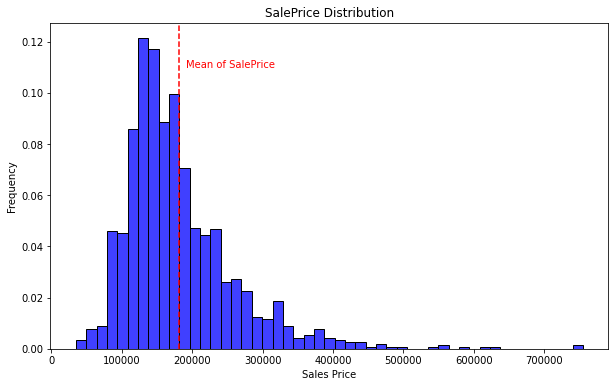

In [15]:
(mu, sigma) = norm.fit(train_data['SalePrice'])
print("The value of mu before log trans: ", mu)
print("The value of sigma before log trans: ", sigma)

fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(train_data['SalePrice'], color = "b", stat = "probability")
ax.xaxis.grid(False)
ax.set(ylabel = "Frequency")
ax.set(xlabel = "Sales Price")
ax.set(title = "SalePrice Distribution")

plt.axvline(mu, color = 'r', LineStyle = '--')
plt.text(mu+10000, 0.11, 'Mean of SalePrice', color = 'r')
fig.show()

The value of mu after log trans:  0.18259076081665218
The value of sigma after log trans:  0.00020524089987278082


C:\Users\tiobi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app
C:\Users\tiobi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


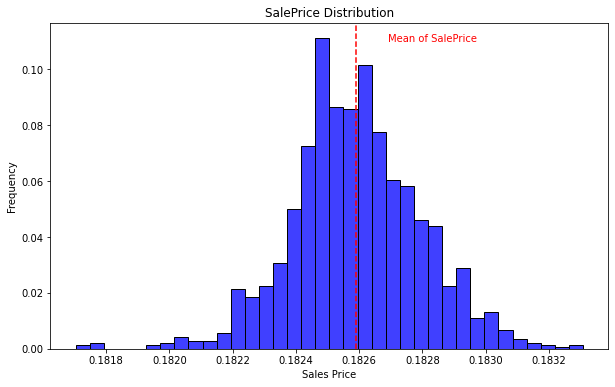

In [28]:
import numpy as np
train_data['SalePrice']  = np.log1p(train_data['SalePrice'])

(mu, sigma) = norm.fit(train_data['SalePrice'])
print("The value of mu after log trans: ", mu)
print("The value of sigma after log trans: ", sigma)

fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(train_data['SalePrice'], color = "b", stat = "probability")
ax.xaxis.grid(False)
ax.set(ylabel = "Frequency")
ax.set(xlabel = "Sales Price")
ax.set(title = "SalePrice Distribution")

plt.axvline(mu, color = 'r', LineStyle = '--')
plt.text(mu+.0001, 0.11, 'Mean of SalePrice', color = 'r')
fig.show()

In [36]:
train_ID = train_data['Id']
test_ID = test_data['Id']
train_data.drop(['Id'], axis = 1, inplace = True)
test_data.drop(['Id'], axis = 1, inplace = True)

train_data.shape, test_data.shape

In [37]:
train_data.shape, test_data.shape

((1458, 80), (1459, 79))

<AxesSubplot:>

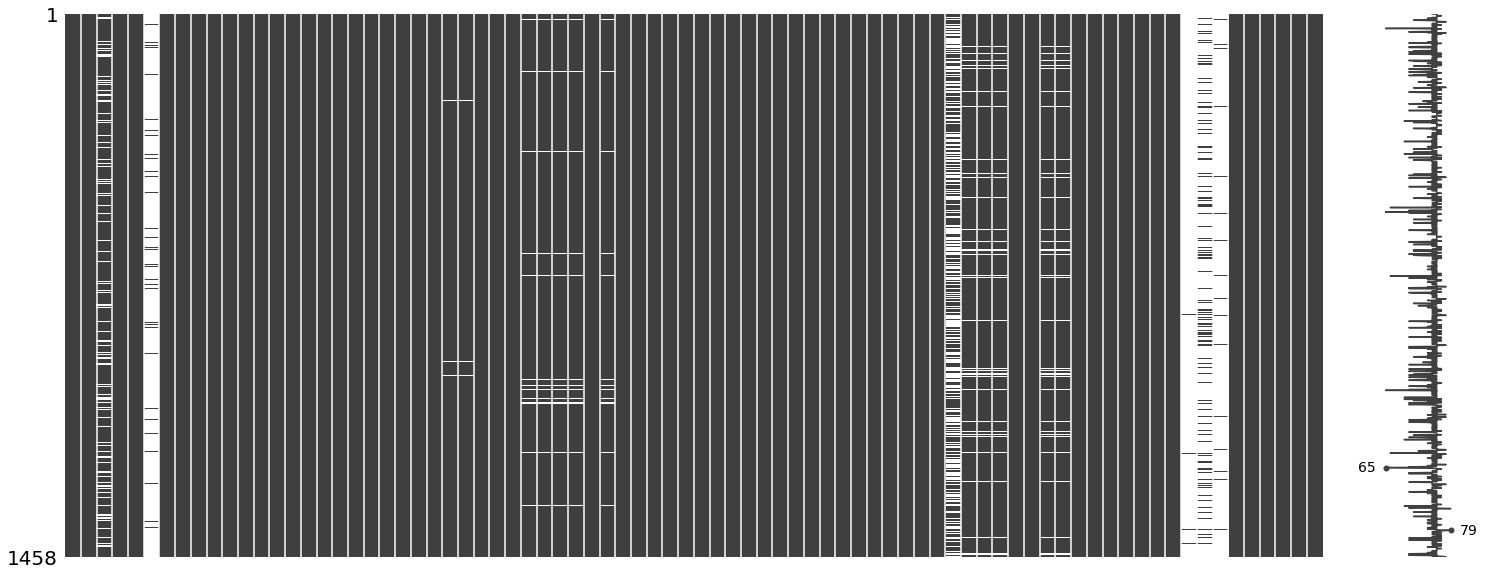

In [38]:
msno.matrix(df = train_data)

In [45]:
for col in train_data.columns:
    if type(col[0]) == 'int' or 'float':
        if col.isnull().any():
            print("col: {:10>} | MSNO: {:4} | Percentage: {:.2f}%".format(col, col.isnull().sum(), 100* col.isnull().sum()/len(col)))

AttributeError: 'str' object has no attribute 'isnull'

In [ ]:
def check_na(data, head_num = 6):